# Import Required Libraries
Import pandas, numpy, matplotlib, and seaborn for data manipulation and visualization.

In [1]:
# Importing required libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
Load the unemployment and inflation datasets using pandas' read_csv function.

In [2]:
# Load the unemployment dataset
df_bezrobocie = pd.read_csv('estat_tps00203.tsv', sep='\t', encoding='utf-8')

# Load the inflation dataset
df_inflacja = pd.read_csv('estat_tec00118.tsv', sep='\t', encoding='utf-8')

# Prepare Unemployment Data
Split the first column into multiple columns, filter the data, and clean column names.

In [3]:
# Split the first column into multiple columns
df_bezrobocie[['freq', 'age', 'unit', 'sex', 'geo']] = df_bezrobocie.iloc[:, 0].str.split(',', expand=True)
df_bezrobocie = df_bezrobocie.drop(df_bezrobocie.columns[0], axis=1)

# Filter the data
df_bezrobocie = df_bezrobocie[df_bezrobocie['unit'] == 'PC_ACT']  # Select only data in percentages of active population
df_bezrobocie = df_bezrobocie[df_bezrobocie['sex'] == 'T']  # Select data for both sexes
df_bezrobocie = df_bezrobocie[df_bezrobocie['age'] == 'Y15-74']  # Select data for ages 15-74

# Clean column names (remove spaces)
df_bezrobocie.columns = df_bezrobocie.columns.str.strip()

# Prepare Inflation Data
Split the first column into multiple columns, filter the data, and clean column names.

In [4]:
# Split the first column into multiple columns
df_inflacja[['freq', 'unit', 'coicop', 'geo']] = df_inflacja.iloc[:, 0].str.split(',', expand=True)
df_inflacja = df_inflacja.drop(df_inflacja.columns[0], axis=1)

# Filter the data
df_inflacja = df_inflacja[df_inflacja['coicop'] == 'CP00']  # Select inflation data

# Clean column names (remove spaces)
df_inflacja.columns = df_inflacja.columns.str.strip()

# Prepare Data for Correlation Analysis
Identify common countries between the datasets and prepare data for correlation calculations.

In [5]:
# Prepare data for correlation analysis
# Identify common countries between the datasets
kraje = df_bezrobocie['geo'].unique()
kraje = [kraj for kraj in kraje if kraj in df_inflacja['geo'].unique()]

# Define the range of years for analysis
lata = [str(rok) for rok in range(2013, 2025)]

# Convert year columns to numeric values for both datasets
for rok in lata:
    if rok in df_bezrobocie.columns:
        df_bezrobocie[rok] = pd.to_numeric(df_bezrobocie[rok].str.replace(':', 'NaN').str.replace('b', '').str.replace('u', ''), errors='coerce')
    if rok in df_inflacja.columns:
        df_inflacja[rok] = pd.to_numeric(df_inflacja[rok].str.replace(':', 'NaN').str.replace('d', ''), errors='coerce')

# Calculate Correlations
Compute the correlation coefficients for each country and store the results in a DataFrame.

In [6]:
# Compute correlation coefficients for each country
korelacje = []

for kraj in kraje:
    bezrobocie = df_bezrobocie[df_bezrobocie['geo'] == kraj][lata].values.flatten()
    inflacja = df_inflacja[df_inflacja['geo'] == kraj][lata].values.flatten()
    
    # Remove NaN values
    mask = ~(np.isnan(bezrobocie) | np.isnan(inflacja))
    bezrobocie = bezrobocie[mask]
    inflacja = inflacja[mask]
    
    if len(bezrobocie) > 0 and len(inflacja) > 0:
        korelacja = np.corrcoef(bezrobocie, inflacja)[0, 1]
        korelacje.append({
            'Kraj': kraj,
            'Korelacja': korelacja
        })

# Store results in a DataFrame
df_korelacje = pd.DataFrame(korelacje)

# Sort by correlation values
df_korelacje = df_korelacje.sort_values('Korelacja', ascending=False)

# Visualize Top Correlations
Create a bar plot of the top 10 countries with the highest correlations and save the plot as a PNG file.

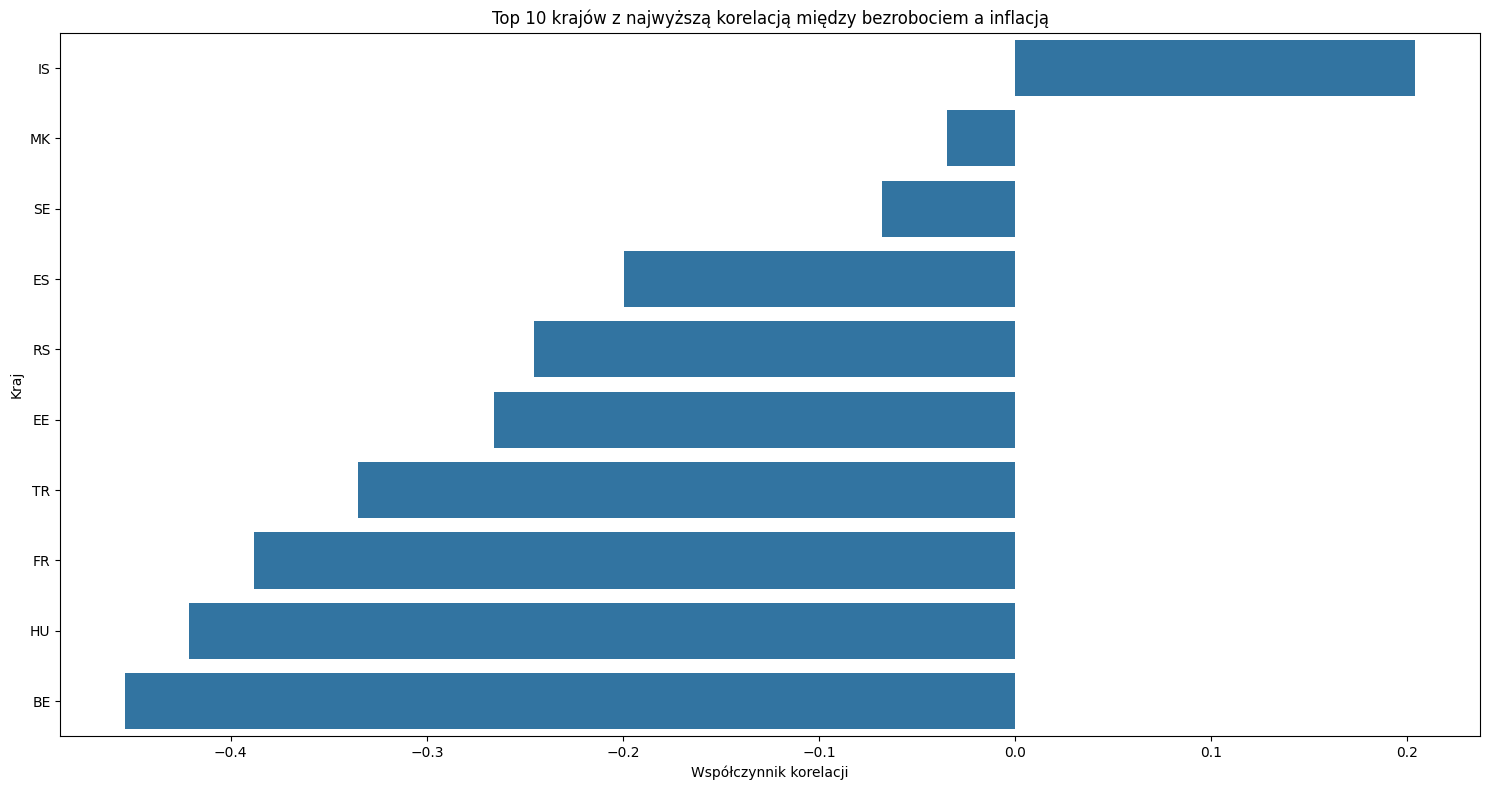

In [7]:
# Visualize Top Correlations
plt.figure(figsize=(15, 8))
sns.barplot(data=df_korelacje.head(10), x='Korelacja', y='Kraj')
plt.title('Top 10 krajów z najwyższą korelacją między bezrobociem a inflacją')
plt.xlabel('Współczynnik korelacji')
plt.ylabel('Kraj')
plt.tight_layout()
plt.show()

# Save Results
Save the correlation results to a CSV file and print the average correlation.

In [8]:
from IPython.display import display

# Wyświetl wyniki w tabeli

display(df_korelacje)

# Oblicz i wyświetl średnią korelację
srednia_korelacja = df_korelacje['Korelacja'].mean()
print(f"\nŚrednia korelacja dla wszystkich krajów: {srednia_korelacja:.3f}")

,Kraj,Korelacja
18,IS,0.204189
24,MK,-0.034924
32,SE,-0.068121
11,ES,-0.199538
31,RS,-0.245343
9,EE,-0.265906
35,TR,-0.335061
14,FR,-0.388275
16,HU,-0.421275
1,BE,-0.454042



Średnia korelacja dla wszystkich krajów: -0.483


In [ ]:
# Wybierz top 5 krajów z najwyższą korelacją
top_kraje = df_korelacje.head(5)['Kraj'].tolist()

# Utwórz wykres dla każdego kraju
plt.figure(figsize=(15, 12))

for i, kraj in enumerate(top_kraje, 1):
    plt.subplot(5, 1, i)
    
    # Pobierz dane dla danego kraju
    bezrobocie = df_bezrobocie[df_bezrobocie['geo'] == kraj][lata].values.flatten()
    inflacja = df_inflacja[df_inflacja['geo'] == kraj][lata].values.flatten()
    
    # Normalizuj dane do wspólnej skali
    bezrobocie_norm = (bezrobocie - np.mean(bezrobocie)) / np.std(bezrobocie)
    inflacja_norm = (inflacja - np.mean(inflacja)) / np.std(inflacja)
    
    # Utwórz wykres
    plt.plot(lata, bezrobocie_norm, 'b-', label='Bezrobocie (znormalizowane)')
    plt.plot(lata, inflacja_norm, 'r-', label='Inflacja (znormalizowana)')
    plt.title(f'{kraj} - Korelacja: {df_korelacje[df_korelacje["Kraj"] == kraj]["Korelacja"].values[0]:.3f}')
    plt.legend()
    plt.grid(True)
    
plt.tight_layout()
plt.show()


In [ ]:
# Przygotuj dane do analizy skupień
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Przygotuj dane
X = []
kraje_do_klastrowania = []

for kraj in kraje:
    bezrobocie = df_bezrobocie[df_bezrobocie['geo'] == kraj][lata].values.flatten()
    inflacja = df_inflacja[df_inflacja['geo'] == kraj][lata].values.flatten()
    
    # Usuń brakujące wartości
    mask = ~(np.isnan(bezrobocie) | np.isnan(inflacja))
    if sum(mask) == len(lata):  # Używamy tylko krajów z kompletnymi danymi
        X.append(np.concatenate([bezrobocie, inflacja]))
        kraje_do_klastrowania.append(kraj)

X = np.array(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Przeprowadź analizę skupień
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Dodaj informacje o klastrach do DataFrame
df_clusters = pd.DataFrame({
    'Kraj': kraje_do_klastrowania,
    'Klaster': clusters
})

# Połącz informacje o klastrach z korelacjami
df_clusters = df_clusters.merge(df_korelacje, on='Kraj', how='left')

# Wyświetl średnie korelacje dla każdego klastra
print("Średnie korelacje w klastrach:")
for i in range(n_clusters):
    mean_corr = df_clusters[df_clusters['Klaster'] == i]['Korelacja'].mean()
    count = df_clusters[df_clusters['Klaster'] == i].shape[0]
    print(f"Klaster {i}: {mean_corr:.3f} (liczba krajów: {count})")

# Wizualizacja klastrów
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    cluster_data = df_clusters[df_clusters['Klaster'] == i]
    plt.scatter(cluster_data.index, cluster_data['Korelacja'], label=f'Klaster {i}')

plt.title('Klastry krajów na podstawie korelacji bezrobocie-inflacja')
plt.xlabel('Indeks kraju')
plt.ylabel('Współczynnik korelacji')
plt.legend()
plt.grid(True)
plt.show()

# Wyświetl kraje w każdym klastrze
print("\nKraje w klastrach:")
for i in range(n_clusters):
    print(f"\nKlaster {i}:")
    cluster_countries = df_clusters[df_clusters['Klaster'] == i]['Kraj'].tolist()
    print(", ".join(cluster_countries))


In [ ]:
from scipy import stats

# Przygotuj dane do analizy
wszystkie_bezrobocie = []
wszystkie_inflacja = []

for kraj in kraje:
    bezrobocie = df_bezrobocie[df_bezrobocie['geo'] == kraj][lata].values.flatten()
    inflacja = df_inflacja[df_inflacja['geo'] == kraj][lata].values.flatten()
    
    # Usuń brakujące wartości
    mask = ~(np.isnan(bezrobocie) | np.isnan(inflacja))
    wszystkie_bezrobocie.extend(bezrobocie[mask])
    wszystkie_inflacja.extend(inflacja[mask])

# Statystyki opisowe
print("Statystyki opisowe:")
print("\nBezrobocie:")
print(pd.Series(wszystkie_bezrobocie).describe())
print("\nInflacja:")
print(pd.Series(wszystkie_inflacja).describe())

# Test normalności
print("\nTest normalności Shapiro-Wilka:")
print("Bezrobocie:", stats.shapiro(wszystkie_bezrobocie))
print("Inflacja:", stats.shapiro(wszystkie_inflacja))

# Test korelacji Spearmana (nie wymaga normalności)
rho, p_value = stats.spearmanr(wszystkie_bezrobocie, wszystkie_inflacja)
print("\nKorelacja Spearmana:")
print(f"rho: {rho:.3f}")
print(f"p-value: {p_value:.3e}")

# Wizualizacja rozkładów
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(wszystkie_bezrobocie, kde=True)
plt.title('Rozkład bezrobocia')
plt.xlabel('Stopa bezrobocia (%)')

plt.subplot(1, 2, 2)
sns.histplot(wszystkie_inflacja, kde=True)
plt.title('Rozkład inflacji')
plt.xlabel('Stopa inflacji (%)')

plt.tight_layout()
plt.show()
